In [1]:
# Libraries
# from get_data import fetch_data # Module to fetch and process data
import pandas as pd
import numpy as np
import pyarrow.parquet as pq
import missingno as msno

import datetime

# import config
from sodapy import Socrata
api_key = os.environ.get("SOCRATA_APP_TOKEN")
import os

In [2]:
# Retrieving the data directly from Amazon S3
raw_data = pq.read_pandas('./Data/collisions.parquet').to_pandas()
# Modifying column names
raw_data.columns = raw_data.columns.str.lower().str.replace(' ', '_')
raw_data.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,cross_street_name,off_street_name,...,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code_1,vehicle_type_code_2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,04/14/2021,5:32,,,NaN,NaN,,BRONX WHITESTONE BRIDGE,,,...,Unspecified,,,,4407480,Sedan,Sedan,,,
1,04/13/2021,21:35,BROOKLYN,11217,40.68358,-73.97617,"(40.68358, -73.97617)",,,620 ATLANTIC AVENUE,...,,,,,4407147,Sedan,,,,
2,04/15/2021,16:15,,,NaN,NaN,,HUTCHINSON RIVER PARKWAY,,,...,,,,,4407665,Station Wagon/Sport Utility Vehicle,,,,
3,04/13/2021,16:00,BROOKLYN,11222,NaN,NaN,,VANDERVORT AVENUE,ANTHONY STREET,,...,Unspecified,,,,4407811,Sedan,,,,
4,04/12/2021,8:25,,,0.00000,0.00000,"(0.0, 0.0)",EDSON AVENUE,,,...,Unspecified,,,,4406885,Station Wagon/Sport Utility Vehicle,Sedan,,,


In [3]:
raw_data.crash_date = pd.DatetimeIndex(raw_data.crash_date)
min_date = raw_data.crash_date.min()
max_date = raw_data.crash_date.max()
print(f'The dataset covers the period between {min_date} and {max_date}')
missing_dates = raw_data.crash_date.isna().sum()
print(f'There are {missing_dates} missing times')

The dataset covers the period between 2012-07-01 00:00:00 and 2022-01-04 00:00:00
There are 0 missing times


In [4]:
raw_data = raw_data.replace('', np.nan)
raw_data = raw_data.replace('unspecified', np.nan)
raw_data = raw_data.replace('Unspecified', np.nan)

<AxesSubplot:>

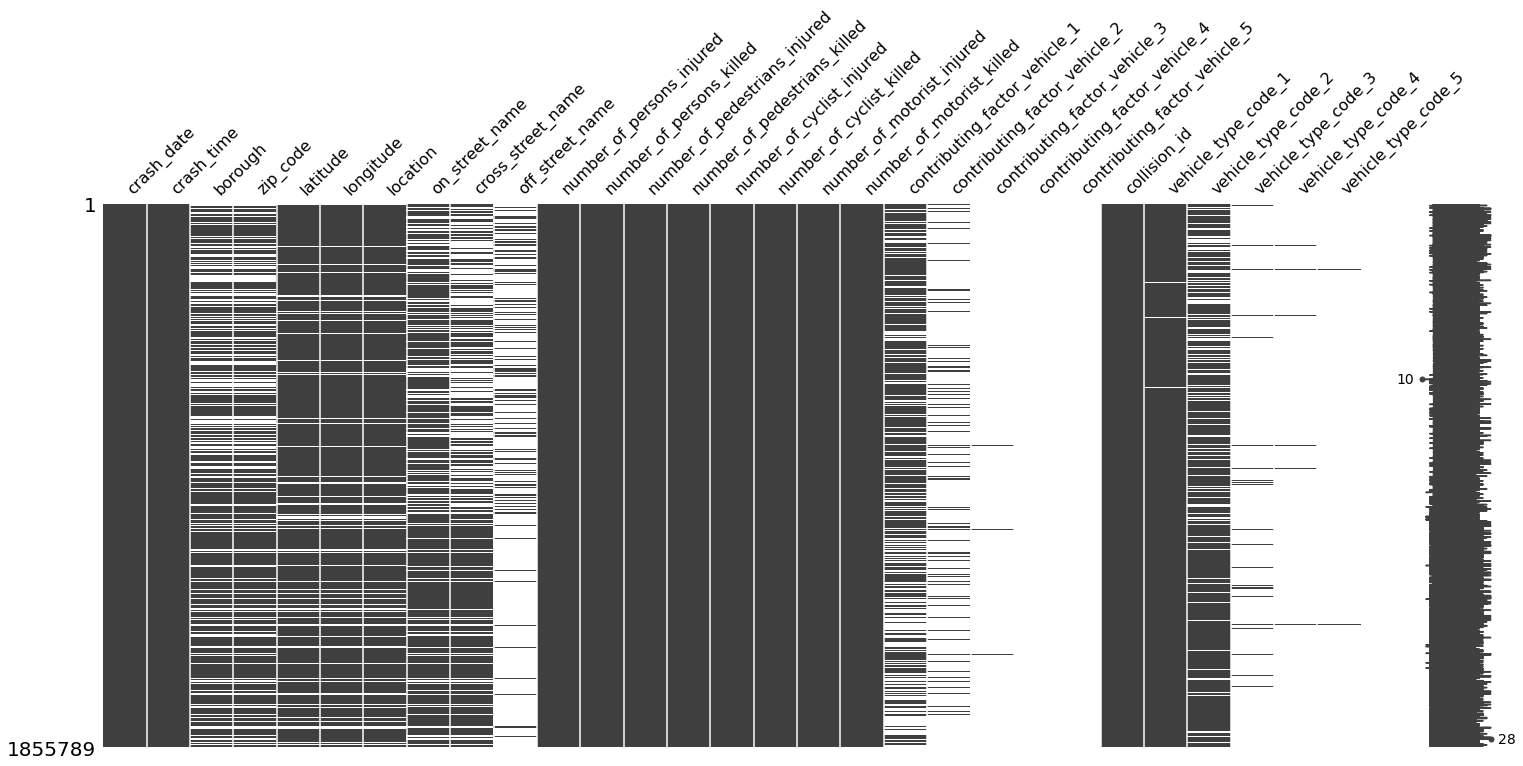

In [5]:
%matplotlib inline
msno.matrix(raw_data)

In [6]:
print(f'Dataset contains {raw_data.shape[0]} collision records with {raw_data.shape[1]} columns')
print('\n')
print("Missing Data:\n-------------")
print(raw_data.isna().sum())
print('\n')
print("Column Types\n--------------------------------------")
print(raw_data.dtypes)
print('\n')

Dataset contains 1855789 collision records with 29 columns


Missing Data:
-------------
crash_date                             0
crash_time                             0
borough                           573745
zip_code                          573969
latitude                          216277
longitude                         216277
location                          216277
on_street_name                    380231
cross_street_name                 669818
off_street_name                  1567927
number_of_persons_injured             18
number_of_persons_killed              31
number_of_pedestrians_injured          0
number_of_pedestrians_killed           0
number_of_cyclist_injured              0
number_of_cyclist_killed               0
number_of_motorist_injured             0
number_of_motorist_killed              0
contributing_factor_vehicle_1     659633
contributing_factor_vehicle_2    1604571
contributing_factor_vehicle_3    1847047
contributing_factor_vehicle_4    1854198
contribut

In [7]:
raw_data.crash_date = pd.DatetimeIndex(raw_data.crash_date)
min_date = raw_data.crash_date.min()
max_date = raw_data.crash_date.max()
print(f'The dataset covers the period between {min_date} and {max_date}')
missing_dates = raw_data.crash_date.isna().sum()
print(f'There are {missing_dates} missing dates')

The dataset covers the period between 2012-07-01 00:00:00 and 2022-01-04 00:00:00
There are 0 missing dates


In [8]:
# Latitude and longitude coordinates are: 43.000000, -75.000000.
out_of_nyc = raw_data[(raw_data.longitude < -75) | (raw_data.longitude > -73) | (raw_data.latitude > 41) | (raw_data.latitude < 40)]
out_of_nyc.shape

(2299, 29)

In [13]:
out_of_nyc.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,cross_street_name,off_street_name,...,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code_1,vehicle_type_code_2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
4,2021-04-12,8:25,NaN,NaN,0.0,0.0,"(0.0, 0.0)",EDSON AVENUE,NaN,NaN,...,NaN,NaN,NaN,NaN,4406885,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
97,2021-04-15,9:27,NaN,NaN,0.0,0.0,"(0.0, 0.0)",NORWAY AVENUE,NaN,NaN,...,NaN,NaN,NaN,NaN,4407538,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
314,2021-04-06,16:00,NaN,NaN,0.0,0.0,"(0.0, 0.0)",BEDFORD AVENUE,NaN,NaN,...,NaN,NaN,NaN,NaN,4408107,Bus,NaN,NaN,NaN,NaN
427,2021-04-14,15:00,BROOKLYN,11235,0.0,0.0,"(0.0, 0.0)",GERALD COURT,EAST 7 STREET,NaN,...,NaN,NaN,NaN,NaN,4408054,Sedan,NaN,NaN,NaN,NaN
657,2021-04-14,11:10,NaN,NaN,0.0,0.0,"(0.0, 0.0)",90 AVENUE,NaN,NaN,...,NaN,NaN,NaN,NaN,4407319,Box Truck,Sedan,Sedan,NaN,NaN


In [10]:
# out_of_nyc[['latitude', 'longitude']] = out_of_nyc[['latitude', 'longitude']].replace(0, np.nan)
# out_of_nyc.loc[out_of_nyc['location'] == 0.0, 'location'] = np.nan
# out_of_nyc.loc[out_of_nyc['latitude'] == 0.0, 'latitude'] = np.nan
# out_of_nyc.loc[out_of_nyc['location'] == '(0.0, 0.0)', 'latitude'] = np.nan

# # Replacing these values as NaN
# raw_data.loc[out_of_nyc.index, 'latitude'] = np.nan
# raw_data.loc[out_of_nyc.index, 'longitude'] = np.nan
# raw_data.loc[out_of_nyc.index, 'location'] = np.nan

/opt/miniconda3/envs/data-analysis/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/opt/miniconda3/envs/data-analysis/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [10]:
# Replacing these values as NaN
raw_data.loc[out_of_nyc.index, 'latitude'] = np.nan
raw_data.loc[out_of_nyc.index, 'longitude'] = np.nan
raw_data.loc[out_of_nyc.index, 'location'] = np.nan

In [14]:
raw_data.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,cross_street_name,off_street_name,...,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code_1,vehicle_type_code_2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,2021-04-14,5:32,NaN,NaN,NaN,NaN,NaN,BRONX WHITESTONE BRIDGE,NaN,NaN,...,NaN,NaN,NaN,NaN,4407480,Sedan,Sedan,NaN,NaN,NaN
1,2021-04-13,21:35,BROOKLYN,11217,40.68358,-73.97617,"(40.68358, -73.97617)",NaN,NaN,620 ATLANTIC AVENUE,...,NaN,NaN,NaN,NaN,4407147,Sedan,NaN,NaN,NaN,NaN
2,2021-04-15,16:15,NaN,NaN,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,4407665,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,2021-04-13,16:00,BROOKLYN,11222,NaN,NaN,NaN,VANDERVORT AVENUE,ANTHONY STREET,NaN,...,NaN,NaN,NaN,NaN,4407811,Sedan,NaN,NaN,NaN,NaN
4,2021-04-12,8:25,NaN,NaN,NaN,NaN,NaN,EDSON AVENUE,NaN,NaN,...,NaN,NaN,NaN,NaN,4406885,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


In [15]:
raw_data[
    (raw_data.longitude < -75) | 
    (raw_data.longitude > -73) | 
    (raw_data.latitude > 41) | 
    (raw_data.latitude < 40)
][['latitude', 'longitude']].shape

(0, 2)

In [16]:
locations_df = raw_data[['borough', 'zip_code', 'latitude', 'longitude','location', 'on_street_name', 'cross_street_name']].copy()
# Before augmentation
locations_df = raw_data[['borough', 'zip_code', 'latitude', 'longitude', 'location', 'on_street_name', 'cross_street_name',]].copy()
missing_locations = locations_df.isna().sum()
print("Missing geographical data before augmentation (% of total):\n-----------------------------------------------------------")
round(missing_locations/len(raw_data) * 100, 1)

Missing geographical data before augmentation (% of total):
-----------------------------------------------------------


borough              30.9
zip_code             30.9
latitude             11.8
longitude            11.8
location             11.8
on_street_name       20.5
cross_street_name    36.1
dtype: float64

In [17]:
# Filtering out rows with missing coordinates
# Necessary to avoid overfilling the bottom rows
locations_with_coordinates = locations_df[locations_df.location.notna()]
# Grouping records by location
duplicated_rows = pd.concat(g for _, g in locations_with_coordinates.groupby(['location']) if len(g) > 1)


In [20]:
duplicated_rows.head(50)

,borough,zip_code,latitude,longitude,location,on_street_name,cross_street_name
1467739,STATEN ISLAND,10307,40.498949,-74.244365,"(40.4989488, -74.2443651)",SWINNERTON STREET,BILLOP AVENUE
1786949,STATEN ISLAND,10307,40.498949,-74.244365,"(40.4989488, -74.2443651)",SWINNERTON STREET,BILLOP AVENUE
1496035,STATEN ISLAND,10307,40.499842,-74.239917,"(40.499842, -74.2399169)",YETMAN AVENUE,BILLOP AVENUE
1664512,STATEN ISLAND,10307,40.499842,-74.239917,"(40.499842, -74.2399169)",YETMAN AVENUE,BILLOP AVENUE
618689,STATEN ISLAND,10307,40.500023,-74.239020,"(40.500023, -74.23902)",ROCKAWAY STREET,BILLOP AVENUE
910759,STATEN ISLAND,10307,40.500023,-74.239020,"(40.500023, -74.23902)",ROCKAWAY STREET,BILLOP AVENUE
1378233,STATEN ISLAND,10307,40.500025,-74.239012,"(40.5000251, -74.2390115)",ROCKAWAY STREET,BILLOP AVENUE
1563322,STATEN ISLAND,10307,40.500025,-74.239012,"(40.5000251, -74.2390115)",ROCKAWAY STREET,BILLOP AVENUE
1811889,STATEN ISLAND,10307,40.500025,-74.239012,"(40.5000251, -74.2390115)",ROCKAWAY STREET,BILLOP AVENUE
1110892,STATEN ISLAND,10307,40.500737,-74.248848,"(40.500737, -74.2488483)",CONNECTICUT STREET,CLERMONT AVENUE


In [22]:
# Sum of missing info before fillna
print('Missing values before augmentation')
print(duplicated_rows.borough.isna().sum())
print(duplicated_rows.zip_code.isna().sum())
print(duplicated_rows.on_street_name.isna().sum())
print(duplicated_rows.cross_street_name.isna().sum())

# Forward-filling NA values with previous value
duplicated_rows.borough.fillna(method='ffill', inplace=True)
duplicated_rows.zip_code.fillna(method='ffill', inplace=True)
duplicated_rows.on_street_name.fillna(method='ffill', inplace=True)
duplicated_rows.cross_street_name.fillna(method='ffill', inplace=True)

# Sum of missing info after fillna
print('Missing values after augmentation')
print(duplicated_rows.borough.isna().sum())
print(duplicated_rows.zip_code.isna().sum())
print(duplicated_rows.on_street_name.isna().sum())
print(duplicated_rows.cross_street_name.isna().sum())


Missing values before augmentation
0
0
0
0
Missing values after augmentation
0
0
0
0


In [23]:
raw_data.update(duplicated_rows)
# After augmentation
locations = raw_data[['borough', 'zip_code', 'latitude', 'longitude','location', 'on_street_name', 'cross_street_name',]]
missing_locations = locations.isna().sum()
print("Missing geographical data after augmentation (% of total):\n-----------------------------------------------------------")
round(missing_locations/len(raw_data) * 100, 1)

Missing geographical data after augmentation (% of total):
-----------------------------------------------------------


borough              10.8
zip_code             10.8
latitude             11.8
longitude            11.8
location             11.8
on_street_name        8.7
cross_street_name    10.9
dtype: float64

In [24]:
# Checking for potential errors introduced by fill-forward method
raw_data[raw_data.borough == 'MANHATTAN']['zip_code'].unique()

array(['10025', '10012', '10026', '10014', '10065', '10032', '10036',
       '10016', '10027', '10017', '10001', '10022', '10002', '10029',
       '10024', '10023', '10018', '10035', '10019', '10128', '10010',
       '10039', '10033', '10011', '10003', '10037', '10009', '10021',
       '10031', '10006', '10028', '10005', '10034', '10013', '10004',
       '10040', '10030', '10000', '10038', '10075', '10007', '10069',
       '10020', '10282', '10112', '10119', nan, '10280', '10167', '10168',
       '10103', '10118', '10169', '10456', '10122', '10107', '10155',
       '10045', '10278', '10105', '10271', '10120', '10110', '10281',
       '10172', '10154', '10153', '10158', '10115', '10177', '10041',
       '10165', '10123', '10121', '10179', '10279', '10170', '10151',
       '10171', '10473', '10055', '10178', '10111', '10152', '10173',
       '10106', '10174', '10176', '11101', '10166', '11222', '10048'],
      dtype=object)

In [25]:
# Filtering for records that only include coordinates
only_coordinates = locations[
                           (locations.zip_code.isna()) 
                         & (locations.borough.isna())
                         & (locations.on_street_name.isna())
                         & (locations.cross_street_name.isna())
                         & (locations.location.notna())
                        ][['borough', 
                           'zip_code', 
                           'latitude', 
                           'longitude',
                           'location', 
                           'on_street_name', 
                           'cross_street_name']].copy()
print(only_coordinates.shape)
only_coordinates.head()

(3518, 7)


,borough,zip_code,latitude,longitude,location,on_street_name,cross_street_name
442,NaN,NaN,40.616093,-74.145230,"(40.616093, -74.14523)",NaN,NaN
445,NaN,NaN,40.626140,-74.142760,"(40.62614, -74.14276)",NaN,NaN
1066,NaN,NaN,40.622560,-74.163445,"(40.62256, -74.163445)",NaN,NaN
1559,NaN,NaN,40.610912,-74.161420,"(40.610912, -74.16142)",NaN,NaN
1710,NaN,NaN,40.625984,-74.148590,"(40.625984, -74.14859)",NaN,NaN


In [27]:
# Filtering for records that only include street names
only_streets = raw_data[
                        (raw_data.zip_code.isna()) 
                        & (raw_data.location.isna()) 
                        & ((raw_data.on_street_name.notna())
                        & (raw_data.cross_street_name.notna()))
                        ][['borough', 
                           'zip_code', 
                           'latitude', 
                           'longitude',
                           'location', 
                           'on_street_name', 
                           'cross_street_name',]].copy()
print(only_streets.shape)
only_streets.head()

(105099, 7)


,borough,zip_code,latitude,longitude,location,on_street_name,cross_street_name
14,NaN,NaN,NaN,NaN,NaN,BRUCKNER BLVD,�ST 138 STREET
38,NaN,NaN,NaN,NaN,NaN,EASTCHESTER ROAD,PELHAM PARKWAY NORTH
163,NaN,NaN,NaN,NaN,NaN,Trans- Manhattan Expressway,Amsterdam Avenue
237,NaN,NaN,NaN,NaN,NaN,HYLAN BOULEVARD,STEUBEN STREET
249,NaN,NaN,NaN,NaN,NaN,BRUCKNER BOULEVARD,EAST 135 STREET


In [37]:
import requests
from config import google_api_key

# Creating a new column with latitude and longitude
only_coordinates['latlng'] = list(zip(only_coordinates.latitude, only_coordinates.longitude))
# Removing brackets
only_coordinates.latlng = only_coordinates.latlng.astype(str).str.replace("(", "").str.replace(")", "")
# Reverse geolocation based on coordinates
url = 'https://maps.googleapis.com/maps/api/geocode/json?'
latlng = only_coordinates.latlng
full_addresses = [] # Getting full address based on coordinates
record_number = 0 # Keeping a tally to track progress
for latlng in latlng:
        #print(latlng)
        query_url = f'{url}latlng={latlng}&key={google_api_key}'
        #print(query_url)
        try:
                resp = requests.get(query_url)
                print(resp)
                data = resp.json()
                #print(data)
                record_number += 1
                num_of_rows = len(only_coordinates.latlng)
                print(f'Getting record {record_number} of {num_of_rows}')
                #print(resp)
                
        except:
                print('Incorrectly formatted URL') # Accounts for an incorrect coordinates'
        
        try:
                full_addresses.append(data['results'][1]['formatted_address'])
                #print(full_addresses)
        except:
                print("Data Not Found") # Accounts for addresses not found
                full_addresses.append(np.nan)

/opt/miniconda3/envs/data-analysis/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  import sys


<Response [200]>
Getting record 1 of 3518
<Response [200]>
Getting record 2 of 3518
<Response [200]>
Getting record 3 of 3518
<Response [200]>
Getting record 4 of 3518
<Response [200]>
Getting record 5 of 3518
<Response [200]>
Getting record 6 of 3518
<Response [200]>
Getting record 7 of 3518
<Response [200]>
Getting record 8 of 3518
<Response [200]>
Getting record 9 of 3518
<Response [200]>
Getting record 10 of 3518
<Response [200]>
Getting record 11 of 3518
<Response [200]>
Getting record 12 of 3518
<Response [200]>
Getting record 13 of 3518
<Response [200]>
Getting record 14 of 3518
<Response [200]>
Getting record 15 of 3518
<Response [200]>
Getting record 16 of 3518
<Response [200]>
Getting record 17 of 3518
<Response [200]>
Getting record 18 of 3518
<Response [200]>
Getting record 19 of 3518
<Response [200]>
Getting record 20 of 3518
<Response [200]>
Getting record 21 of 3518
<Response [200]>
Getting record 22 of 3518
<Response [200]>
Getting record 23 of 3518
<Response [200]>
Get

In [38]:
# Adding a new column containing full address found through reverse geocoding
only_coordinates['full_address'] = full_addresses
# Splitting address into new columns
found_addresses = only_coordinates.full_address.str.split(",", n=3, expand=True)
found_addresses.columns = ['on_street_name', 'borough', 'zip_code', 'country']
found_addresses.zip_code = found_addresses.zip_code.str.replace('NY ', '') # Removes 'NY' from zip code
found_addresses.borough = found_addresses.borough.str.upper()
found_addresses.head()

,on_street_name,borough,zip_code,country
442,341 Stewart Ave,STATEN ISLAND,10314,USA
445,Port Richmond Av/Smith Pl,STATEN ISLAND,10302,USA
1066,423 Lisk Ave,STATEN ISLAND,10303,USA
1559,45 Jardine Ave,STATEN ISLAND,10314,USA
1710,500 Morningstar Rd,STATEN ISLAND,10303,USA


In [39]:
raw_data.update(found_addresses)

In [47]:
raw_data.update(found_addresses)
# After augmentation
locations = raw_data[['borough', 'zip_code', 'latitude', 'longitude','location', 'on_street_name', 'cross_street_name',]]
missing_locations = locations.isna().sum()
print("Missing geographical data after augmentation (% of total):\n-----------------------------------------------------------")
round(missing_locations/len(raw_data) * 100, 1)

Missing geographical data after augmentation (% of total):
-----------------------------------------------------------


borough              10.0
zip_code             10.0
latitude             11.8
longitude            11.8
location             11.8
on_street_name        8.5
cross_street_name    10.9
dtype: float64

In [41]:
only_streets = only_streets.sample(frac=0.1)
only_streets.shape

(10510, 7)

In [42]:
# Geolocation based on street address
url = 'https://maps.googleapis.com/maps/api/geocode/json?'
addresses = list(zip(only_streets.on_street_name, only_streets.cross_street_name))
full_addresses = []
latitude = []
longitude = []
record_number = 0 # Keeping a tally to track progress
for address in addresses:
    query_url = f'{url}address={address}&key={google_api_key}'
    try:
        resp = requests.get(query_url)
        data = resp.json()
        record_number += 1
        num_of_rows = len(only_streets.on_street_name)
        print(f'Getting record #{record_number} of {num_of_rows}')
        #print(data)
    except:
        print('Incorrectly formatted URL')  
    
    try:
        full_addresses.append(data['results'][0]['formatted_address'])
        latitude.append(data['results'][0]['geometry']['location']['lat'])
        longitude.append(data['results'][0]['geometry']['location']['lng'])
        
    except:
        print("No Data found") # Accounts for addresses not found in the Google API
        full_addresses.append('NaN')
        latitude.append('NaN')
        longitude.append('NaN')

Getting record #1 of 10510
Getting record #2 of 10510
Getting record #3 of 10510
Getting record #4 of 10510
Getting record #5 of 10510
Getting record #6 of 10510
Getting record #7 of 10510
Getting record #8 of 10510
Getting record #9 of 10510
Getting record #10 of 10510
Getting record #11 of 10510
Getting record #12 of 10510
Getting record #13 of 10510
Getting record #14 of 10510
Getting record #15 of 10510
Getting record #16 of 10510
Getting record #17 of 10510
Getting record #18 of 10510
Getting record #19 of 10510
Getting record #20 of 10510
Getting record #21 of 10510
Getting record #22 of 10510
Getting record #23 of 10510
Getting record #24 of 10510
Getting record #25 of 10510
Getting record #26 of 10510
Getting record #27 of 10510
Getting record #28 of 10510
Getting record #29 of 10510
Getting record #30 of 10510
Getting record #31 of 10510
Getting record #32 of 10510
Getting record #33 of 10510
Getting record #34 of 10510
Getting record #35 of 10510
Getting record #36 of 10510
G

In [43]:
# Adding a new column containing full address found through reverse geocoding
only_streets['full_address'] = full_addresses
# Splitting address into new columns
found_addresses_2 = only_streets.full_address.str.split(",", n=3, expand=True)
found_addresses_2.columns = ['on_street_name', 'borough', 'zip_code', 'country']
found_addresses_2.zip_code = found_addresses_2.zip_code.str.replace('NY ', '') # Removes 'NY' from zip code
found_addresses_2.borough = found_addresses_2.borough.str.upper()
found_addresses_2.head()

,on_street_name,borough,zip_code,country
1784929,W 125 St/Morningside Av,NEW YORK,10027,USA
1590249,260 Christopher Ln Suite 201,STATEN ISLAND,10314,USA
1338985,245 E 78th St,NEW YORK,10075,USA
1302615,Richmond Av/Morani St,STATEN ISLAND,10314,USA
1151574,Cross Island Pkwy/149 St,QUEENS,11357,USA


In [45]:
raw_data.update(found_addresses_2)

In [48]:
# After augmentation
locations = raw_data[['borough', 'zip_code', 'latitude', 'longitude','location', 'on_street_name', 'cross_street_name',]]
missing_locations = locations.isna().sum()
print("Missing geographical data after augmentation (% of total):\n-----------------------------------------------------------")
round(missing_locations/len(raw_data) * 100, 1)

Missing geographical data after augmentation (% of total):
-----------------------------------------------------------


borough              10.0
zip_code             10.0
latitude             11.8
longitude            11.8
location             11.8
on_street_name        8.5
cross_street_name    10.9
dtype: float64

In [11]:
# Filtering for rows with missing values for either persons injured or killed
missing_persons = raw_data[(raw_data['number_of_persons_injured'].isna()) 
        | (raw_data['number_of_persons_killed'].isna())]
missing_persons.shape

(37, 29)

In [12]:
raw_data[['number_of_persons_injured', 'number_of_persons_killed',
       'number_of_pedestrians_injured', 'number_of_pedestrians_killed',
       'number_of_cyclist_injured', 'number_of_cyclist_killed',
       'number_of_motorist_injured', 'number_of_motorist_killed']].isna().sum()

number_of_persons_injured        18
number_of_persons_killed         31
number_of_pedestrians_injured     0
number_of_pedestrians_killed      0
number_of_cyclist_injured         0
number_of_cyclist_killed          0
number_of_motorist_injured        0
number_of_motorist_killed         0
dtype: int64

In [1]:
# raw_data['number_of_persons_injured'] = raw_data['number_of_pedestrians_injured'] + raw_data['number_of_cyclist_injured'] + raw_data['number_of_motorist_injured']
# raw_data['number_of_persons_killed'] = raw_data['number_of_pedestrians_killed'] + raw_data['number_of_cyclist_killed'] + raw_data['number_of_motorist_killed']

In [2]:
# total_number_of_persons_killed = raw_data.number_of_persons_killed.sum()
# total_number_of_persons_killed

In [3]:
# sum(raw_data['number_of_pedestrians_killed'] + raw_data['number_of_cyclist_killed'] + raw_data['number_of_motorist_killed'])

In [24]:
# raw_data['number_of_persons_injured'] = raw_data[['number_of_pedestrians_injured', 'number_of_cyclist_injured','number_of_motorist_injured']].sum(axis=1)
# raw_data['number_of_persons_killed'] = raw_data[['number_of_pedestrians_injured', 'number_of_cyclist_injured','number_of_motorist_injured']].sum(axis=1)
# raw_data.loc[raw_data, 'number_of_persons_killed'] = missing_persons[['number_of_pedestrians_injured', 'number_of_cyclist_injured', 'number_of_motorist_injured']].sum(axis=1)

In [16]:
raw_data.loc[missing_persons.index, 'number_of_persons_injured'] = missing_persons[['number_of_pedestrians_injured', 'number_of_cyclist_injured','number_of_motorist_injured']].sum(axis=1)
raw_data.loc[missing_persons.index, 'number_of_persons_killed'] = missing_persons[['number_of_pedestrians_injured', 'number_of_cyclist_injured', 'number_of_motorist_injured']].sum(axis=1)

In [17]:
raw_data[['number_of_persons_injured', 'number_of_persons_killed',
       'number_of_pedestrians_injured', 'number_of_pedestrians_killed',
       'number_of_cyclist_injured', 'number_of_cyclist_killed',
       'number_of_motorist_injured', 'number_of_motorist_killed']].isna().sum()

number_of_persons_injured        0
number_of_persons_killed         0
number_of_pedestrians_injured    0
number_of_pedestrians_killed     0
number_of_cyclist_injured        0
number_of_cyclist_killed         0
number_of_motorist_injured       0
number_of_motorist_killed        0
dtype: int64